# ツリー系アルゴリズム

## Data Load

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

電気通信事業者の解約データを読み込む  
(https://www.kaggle.com/blastchar/telco-customer-churn)

In [44]:
input_path = '../data'
df = pd.read_csv(os.path.join(input_path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv'))

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
print('size:', df.shape)

size: (7043, 21)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
# TotalCharges列に空文字が存在して文字列型になっている
col = 'TotalCharges'
df[(df[col].str.match('\d+\.\d+') == False) & (df[col].str.match('\d+') == False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [54]:
# 欠損値に置換して小数型に変換する
col = 'TotalCharges'
df[col] = df[col].replace({' ': np.nan}).astype(float)

## Data Partition

In [56]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, train_size=0.8, random_state=2021, shuffle=True)
print('original_size:', df.shape)
print('train_size:', train_df.shape)
print('test_size:', test_df.shape)

original_size: (7043, 21)
train_size: (5634, 21)
test_size: (1409, 21)


きちんと分析を行う場合は、トレーニングデータとテストデータの各特徴量を比較するなど必要だが、ここでは自分でランダム分割しているのでトレーニングデータだけ見ていく

In [57]:
# 分割後のデータを保存しておく
train_df.to_csv(os.path.join(input_path, 'train_df.csv'), encoding='utf-8', index=False)
test_df.to_csv(os.path.join(input_path, 'test_df.csv'), encoding='utf-8', index=False)

## Data Overview

トレーニングデータの解約率は26.32%


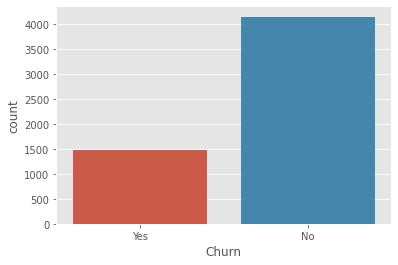

In [11]:
sns.countplot(x='Churn', data=train_df)

churn_rate = len(train_df[train_df['Churn'] == 'Yes']) / len(train_df['Churn'])
print('トレーニングデータの解約率は{:.2%}'.format(churn_rate))

### まずは数値変数を見てみる

In [12]:
# まとめてプロットするための関数を定義しておく

f_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
           'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
           'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

def plot_all(data, plot_f, f_list):
    fig, axes = plt.subplots(figsize=(20,20), ncols=4, nrows=4)
    sns.histplot(x=plot_f, hue=f_list[0], data=data, ax=axes[0,0], kde=True)
    sns.histplot(x=plot_f, hue=f_list[1], data=data, ax=axes[0,1], kde=True)
    sns.histplot(x=plot_f, hue=f_list[2], data=data, ax=axes[0,2], kde=True)
    sns.histplot(x=plot_f, hue=f_list[3], data=data, ax=axes[0,3], kde=True)
    sns.histplot(x=plot_f, hue=f_list[4], data=data, ax=axes[1,0], kde=True)
    sns.histplot(x=plot_f, hue=f_list[5], data=data, ax=axes[1,1], kde=True)
    sns.histplot(x=plot_f, hue=f_list[6], data=data, ax=axes[1,2], kde=True)
    sns.histplot(x=plot_f, hue=f_list[7], data=data, ax=axes[1,3], kde=True)
    sns.histplot(x=plot_f, hue=f_list[8], data=data, ax=axes[2,0], kde=True)
    sns.histplot(x=plot_f, hue=f_list[9], data=data, ax=axes[2,1], kde=True)
    sns.histplot(x=plot_f, hue=f_list[10], data=data, ax=axes[2,2], kde=True)
    sns.histplot(x=plot_f, hue=f_list[11], data=data, ax=axes[2,3], kde=True)
    sns.histplot(x=plot_f, hue=f_list[12], data=data, ax=axes[3,0], kde=True)
    sns.histplot(x=plot_f, hue=f_list[13], data=data, ax=axes[3,1], kde=True)
    sns.histplot(x=plot_f, hue=f_list[14], data=data, ax=axes[3,2], kde=True)
    sns.histplot(x=plot_f, hue=f_list[15], data=data, ax=axes[3,3], kde=True)
    
    plt.show()

In [ ]:
target = 'Churn'
col = 'tenure'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.boxplot(x=col, data=train_df, ax=axes[0], orient='v')
sns.boxenplot(x=target, y=col, data=train_df, ax=axes[1])

解約した人の方が平均契約期間（月）が短い  
解約する人はすぐに見切りをつけるのか、単に解約したから短いのか

<AxesSubplot:xlabel='tenure', ylabel='Count'>

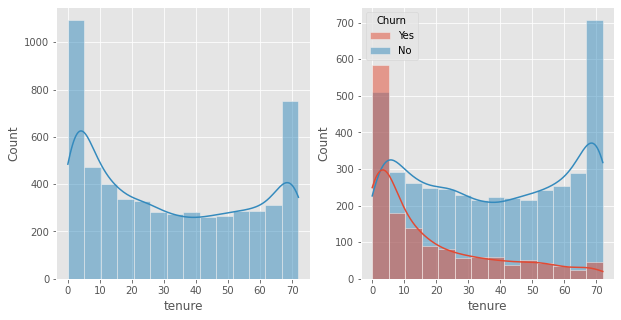

In [14]:
%matplotlib inline

plot_f = 'tenure'

fig, axes = plt.subplots(figsize=(10,5), ncols=2)
sns.histplot(x=plot_f, data=train_df, kde=True, ax=axes[0])
sns.histplot(x=plot_f, data=train_df, hue='Churn', kde=True, ax=axes[1])

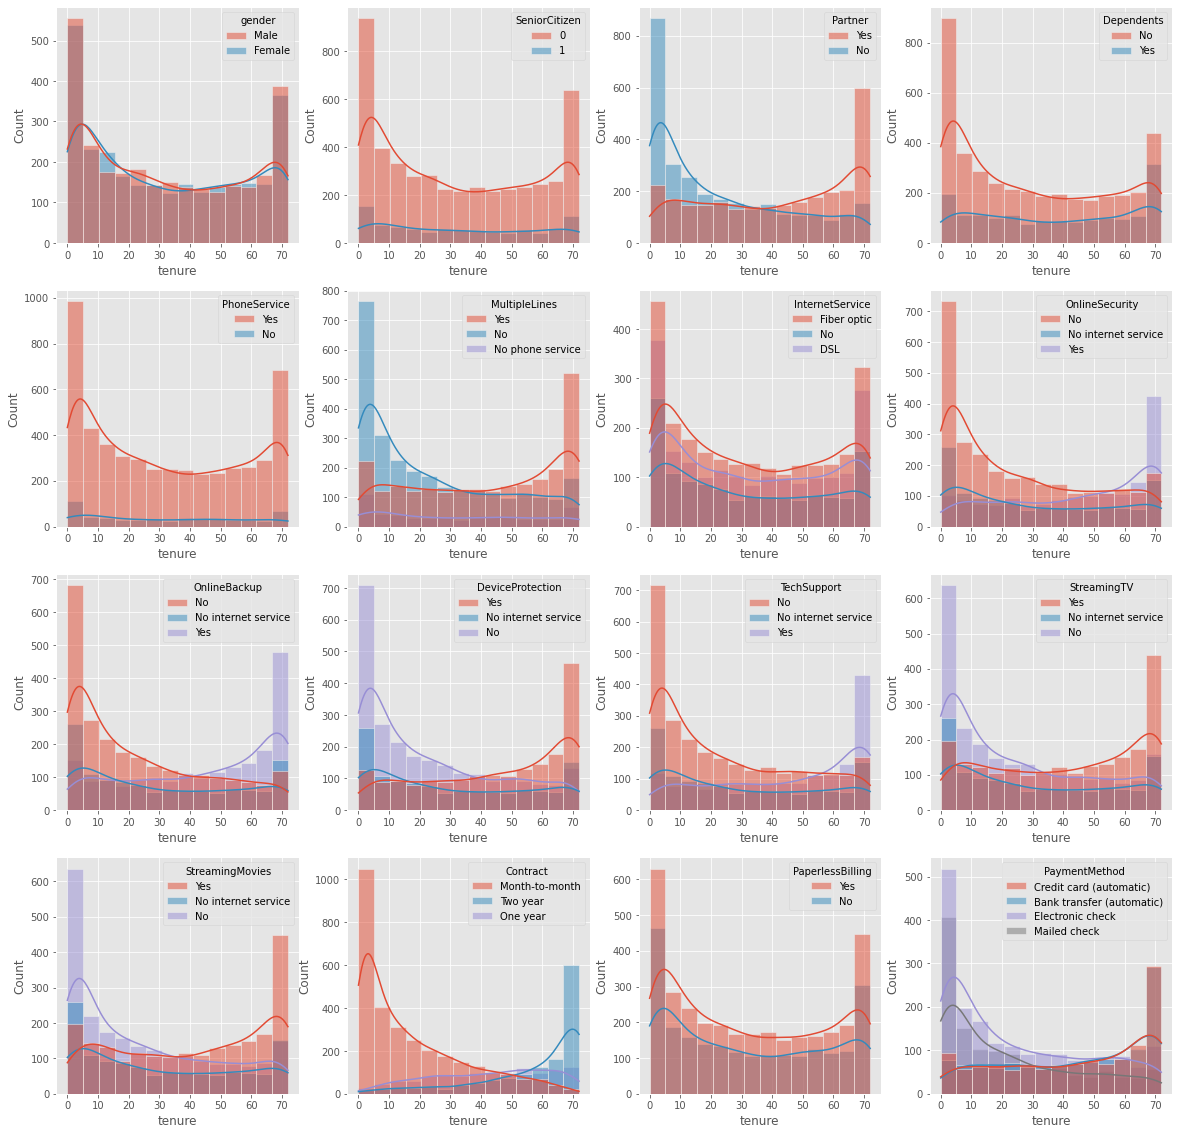

In [15]:
f_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
           'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
           'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
plot_f = 'tenure'

plot_all(data=train_df, plot_f=plot_f, f_list=f_list)

複数回線契約しているかどうかでも契約期間の分布が異なる  
⇒配偶者がいる  
⇒家族で一本の契約にするから複数回線契約することになる  
⇒乗り換えるときは全員分の乗り換えになる  
⇒面倒だから長く契約する

In [ ]:
col = 'MonthlyCharges'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.boxenplot(x=col, data=train_df, ax=axes[0], orient='v')
sns.boxenplot(x=target, y=col, data=train_df, ax=axes[1])

解約した人の方が平均月額料金が高い

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

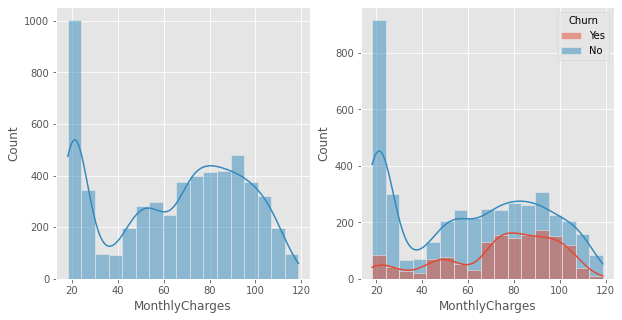

In [17]:
%matplotlib inline

plot_f = 'MonthlyCharges'

fig, axes = plt.subplots(figsize=(10,5), ncols=2)
sns.histplot(x=plot_f, data=train_df, kde=True, ax=axes[0])
sns.histplot(x=plot_f, data=train_df, hue='Churn', kde=True, ax=axes[1])

3つピークがある⇒多分プロバイダが3カテゴリあるからそれぞれ対応しているはず

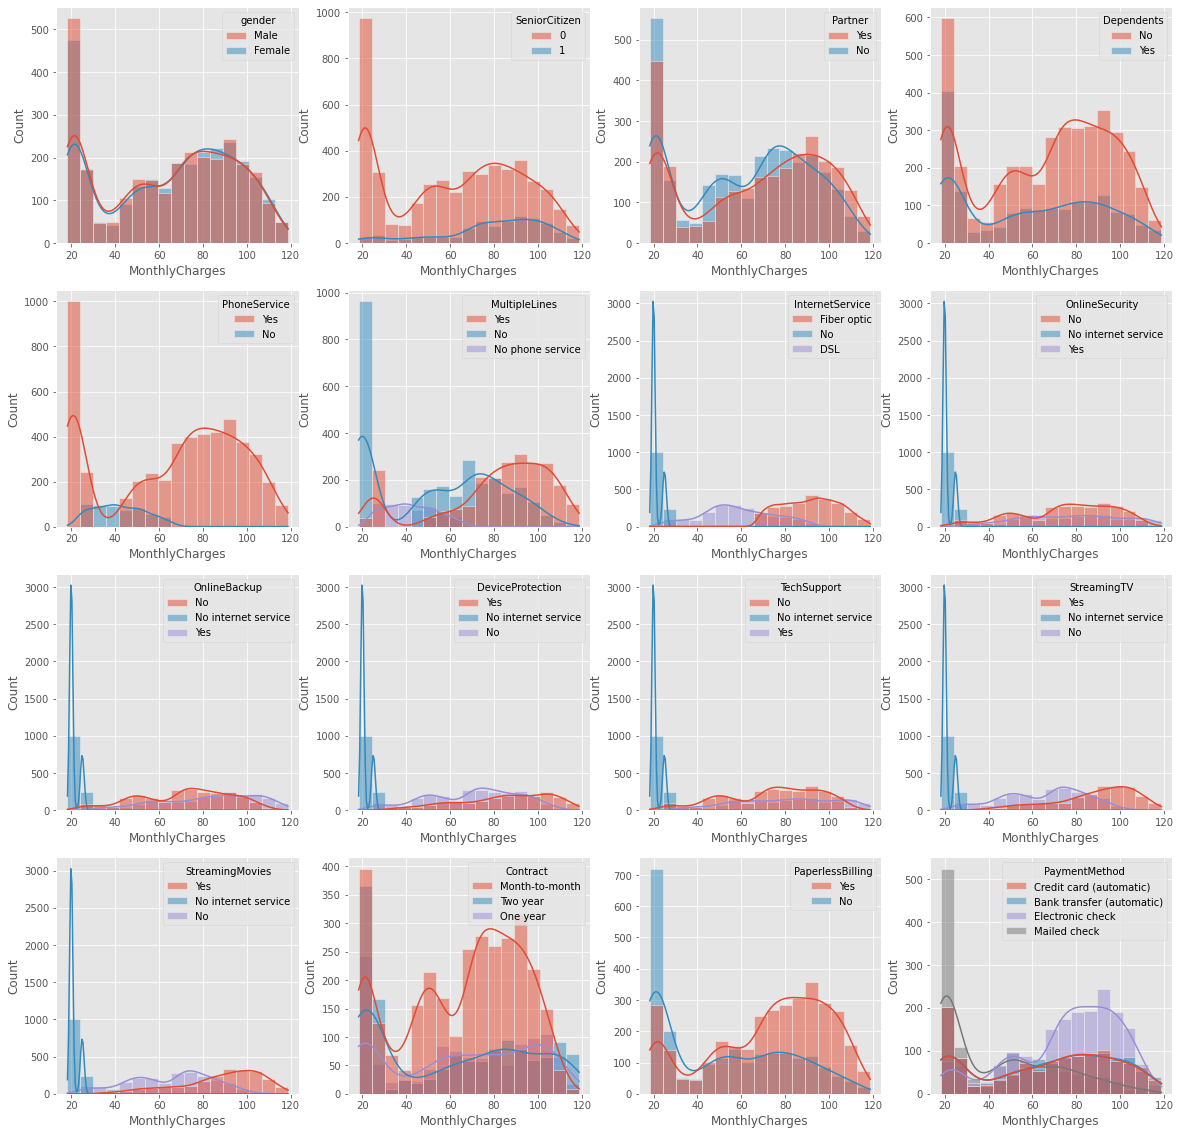

In [18]:
f_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
           'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
           'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
plot_f = 'MonthlyCharges'

plot_all(data=train_df, plot_f=plot_f, f_list=f_list)

月額料金の決まり方は
- インターネットを使用していない
    - 低額ゾーン
- 使用している
    - プロバイダがDSL
        - 中間ゾーン
    - プロバイダがFiber optic
        - 高額ゾーン


In [ ]:
col = 'TotalCharges'

train_df[col] = train_df[col].replace({' ': np.nan}).astype(float)
fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.boxenplot(x=col, data=train_df, ax=axes[0], orient='v')
sns.boxenplot(x=target, y=col, data=train_df, ax=axes[1])

総支払料金の平均は解約していない人の方が高い

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

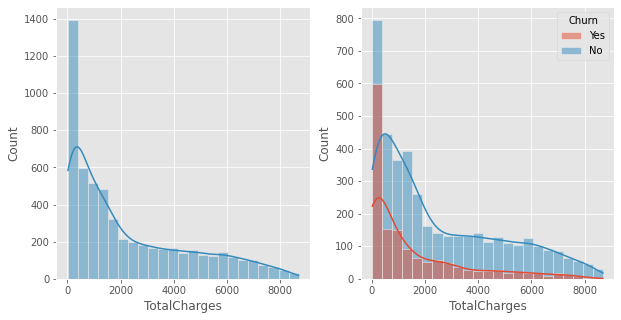

In [26]:
%matplotlib inline

plot_f = 'TotalCharges'

fig, axes = plt.subplots(figsize=(10,5), ncols=2)
sns.histplot(x=plot_f, data=train_df, kde=True, ax=axes[0])
sns.histplot(x=plot_f, data=train_df, hue='Churn', kde=True, ax=axes[1])

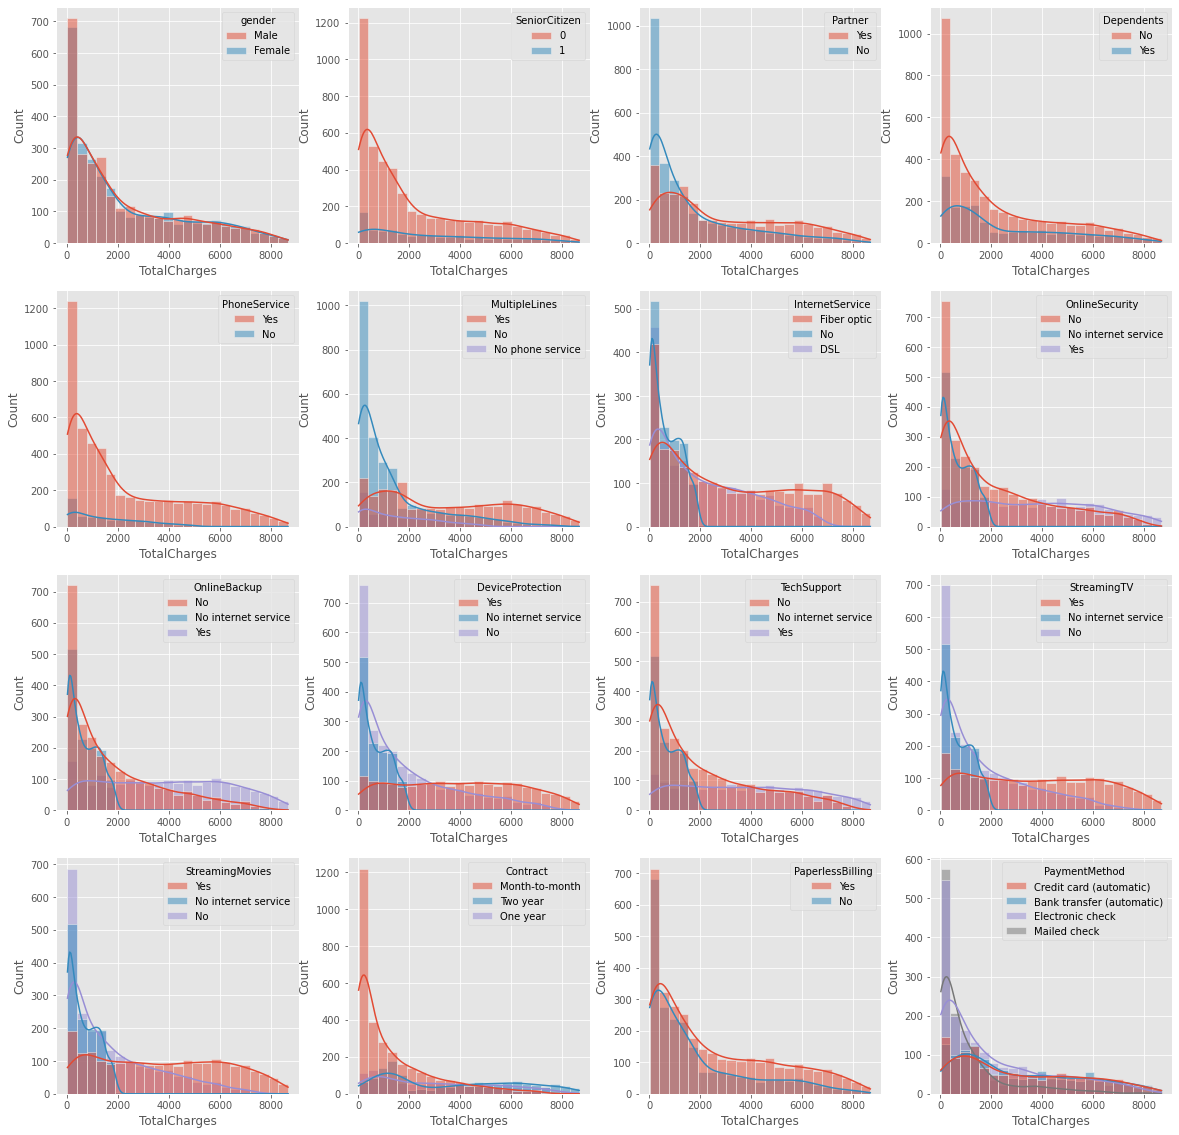

In [108]:
f_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
           'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
           'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
plot_f = 'TotalCharges'

plot_all(data=train_df, plot_f=plot_f, f_list=f_list)

インターネット契約しているか否かでコスト感が全く異なる  
- 契約していないと2000ドルを超えない  
⇒契約しているか否かで解約の基準が異なると考えられる  
⇒モデルを分ける
  
インターネット契約していないグループのモデルでは以下特徴量は有効でない  
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies

### 次に２変数で可視化してみる

Text(0.5, 1.0, 'MonthlyCharges-TotalCharges')

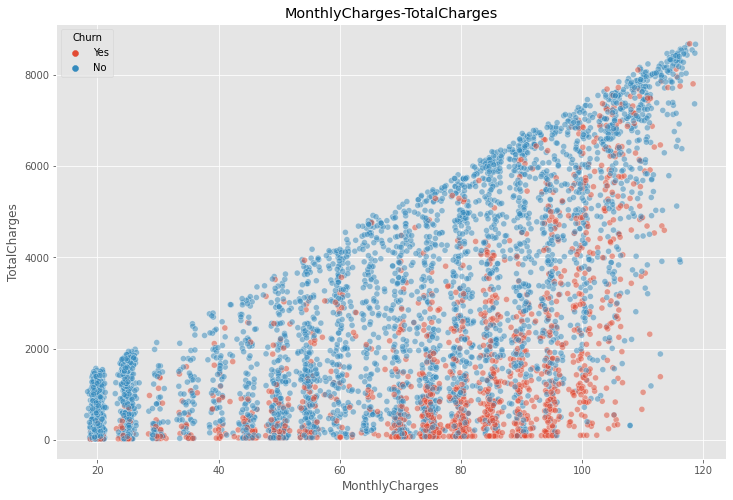

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=train_df, hue='Churn', alpha=0.5)
plt.title('MonthlyCharges-TotalCharges')

/var/folders/v6/1f2j3j154zj9g03clj2_yt_00000gn/T/ipykernel_43584/1144511093.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  H = ax.hist2d(x,y, bins=40, cmap=cm.jet)
/var/folders/v6/1f2j3j154zj9g03clj2_yt_00000gn/T/ipykernel_43584/1144511093.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(H[3],ax=ax)


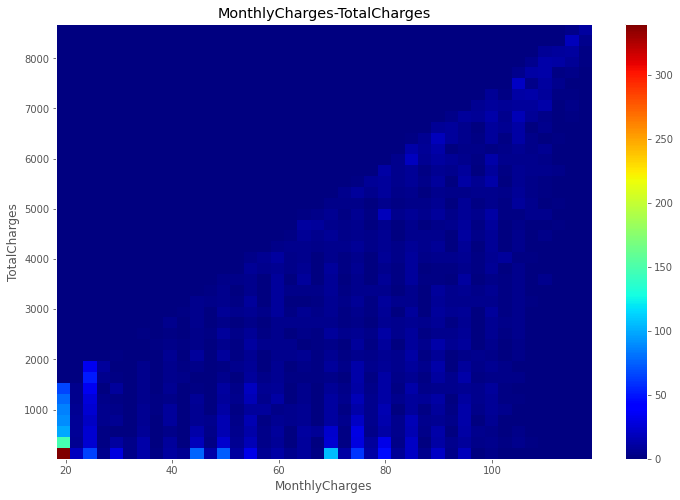

In [30]:
from matplotlib import cm
%matplotlib inline

tmp = train_df.dropna()
x = tmp['MonthlyCharges']
y = tmp['TotalCharges']

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

H = ax.hist2d(x,y, bins=40, cmap=cm.jet)
ax.set_title('MonthlyCharges-TotalCharges')
ax.set_xlabel('MonthlyCharges')
ax.set_ylabel('TotalCharges')
fig.colorbar(H[3],ax=ax)

plt.show()

Text(0.5, 1.0, 'tenure-TotalCharges')

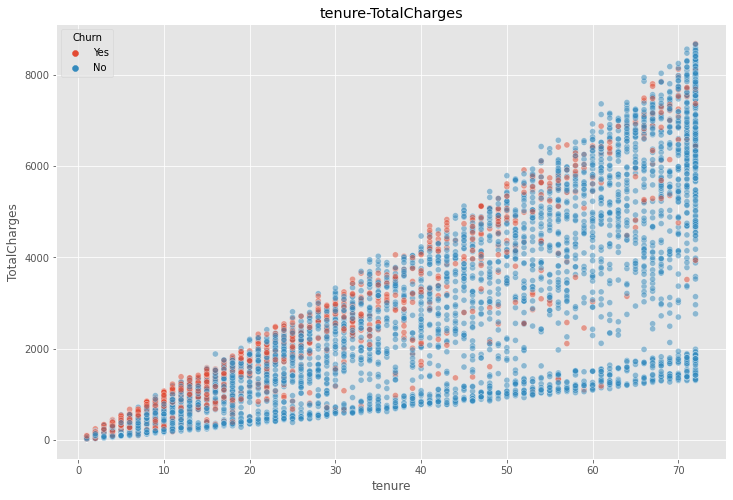

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='tenure', y='TotalCharges', data=train_df, hue='Churn', alpha=0.5)
plt.title('tenure-TotalCharges')

/var/folders/v6/1f2j3j154zj9g03clj2_yt_00000gn/T/ipykernel_43584/3353832164.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  H = ax.hist2d(x,y, bins=40, cmap=cm.jet)
/var/folders/v6/1f2j3j154zj9g03clj2_yt_00000gn/T/ipykernel_43584/3353832164.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(H[3],ax=ax)


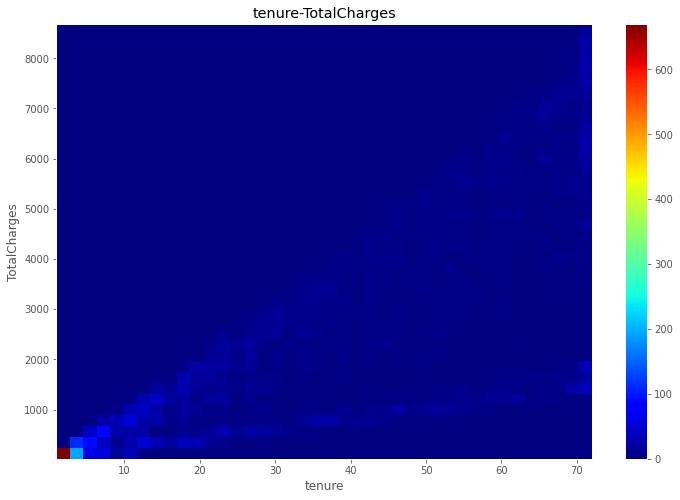

In [31]:
from matplotlib import cm
%matplotlib inline

tmp = train_df.dropna()
x = tmp['tenure']
y = tmp['TotalCharges']

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

H = ax.hist2d(x,y, bins=40, cmap=cm.jet)
ax.set_title('tenure-TotalCharges')
ax.set_xlabel('tenure')
ax.set_ylabel('TotalCharges')
fig.colorbar(H[3],ax=ax)

plt.show()

Text(0.5, 1.0, 'MonthlyCharges-tenure')

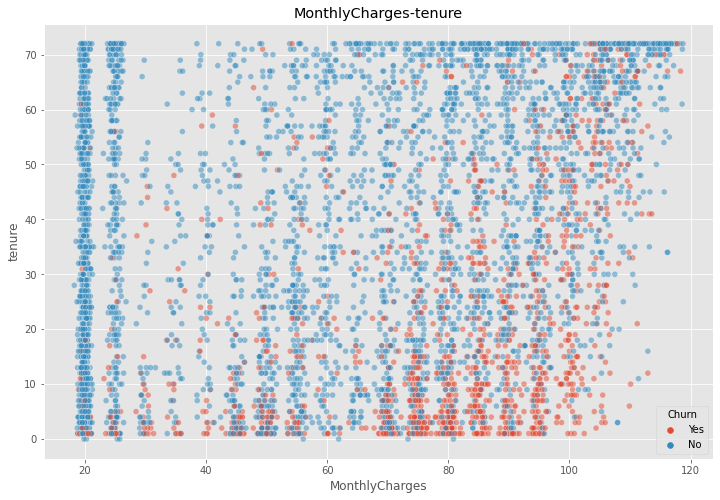

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='MonthlyCharges', y='tenure', data=train_df, hue='Churn', alpha=0.5)
plt.title('MonthlyCharges-tenure')

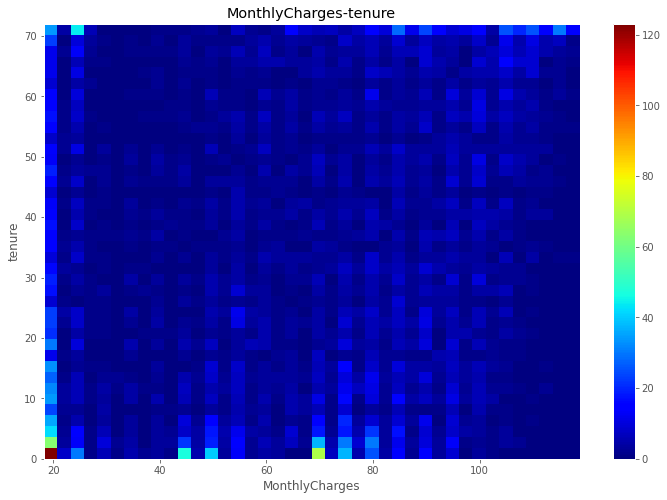

In [33]:
from matplotlib import cm
%matplotlib inline

x = train_df['MonthlyCharges']
y = train_df['tenure']

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

H = ax.hist2d(x,y, bins=40, cmap=cm.jet)
ax.set_title('MonthlyCharges-tenure')
ax.set_xlabel('MonthlyCharges')
ax.set_ylabel('tenure')
fig.colorbar(H[3],ax=ax)

plt.show()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

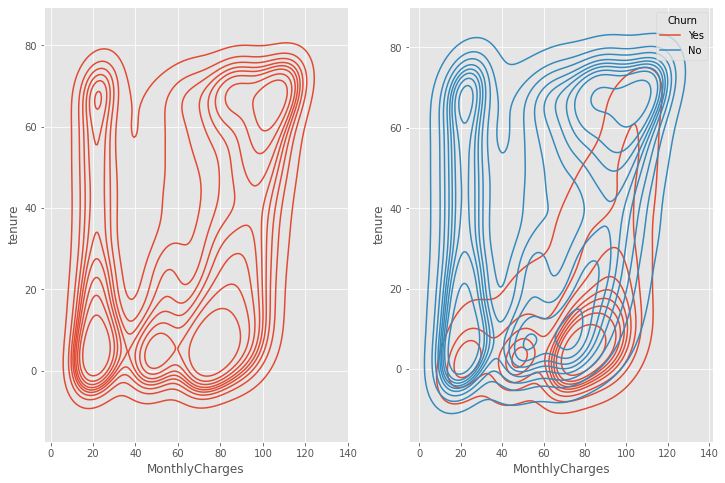

In [33]:
# 解約しなかった人は２つの分布が混ざってそうなので可視化してみる
fig, axes = plt.subplots(figsize=(12,8), ncols=2)
sns.kdeplot(data=train_df, x='MonthlyCharges', y='tenure', ax=axes[0])
sns.kdeplot(data=train_df, x='MonthlyCharges', y='tenure', hue='Churn', ax=axes[1])

Text(0.5, 1.0, 'TotalCharges-tenure_times_MonthlyCharges')

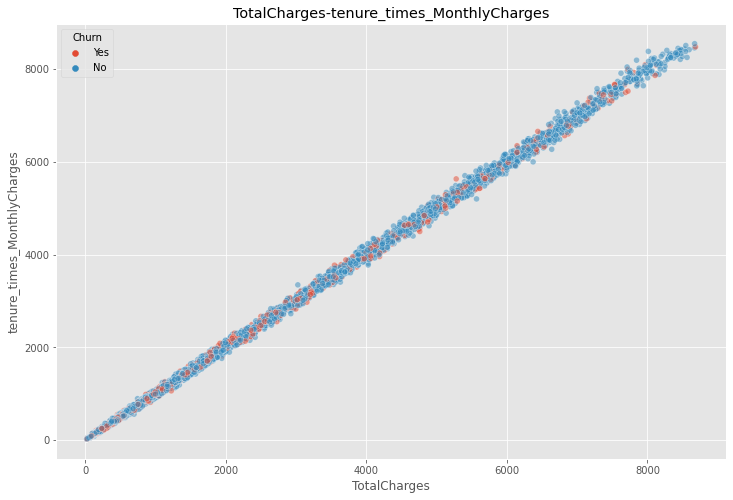

In [35]:
# 普通に考えればトータル料金＝月額料金＊契約期間なので、実際どうか確認してみる
train_df['tenure_times_MonthlyCharges'] = train_df['tenure'] * train_df['MonthlyCharges']

%matplotlib inline
plt.figure(figsize=(12,8))
sns.scatterplot(x='TotalCharges', y='tenure_times_MonthlyCharges', data=train_df, hue='Churn', alpha=0.5)
plt.title('TotalCharges-tenure_times_MonthlyCharges')

TotalChargesは普通にMonthlyChargesとtenureの積  
⇒MonthlyChargesとtenureの分布で説明できる

### 次にカテゴリ変数を見てみる

<AxesSubplot:xlabel='Churn', ylabel='count'>

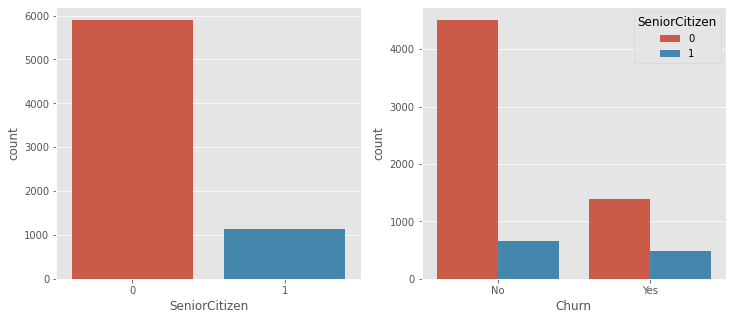

In [43]:
target = 'Churn'
col = 'SeniorCitizen'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.countplot(x=col, data=df, ax=axes[0])
sns.countplot(x=target, data=df, hue=col, ax=axes[1])

解約した人に占める高齢者の割合は、解約しなかった人に占めるそれより大きい

<AxesSubplot:xlabel='Churn', ylabel='count'>

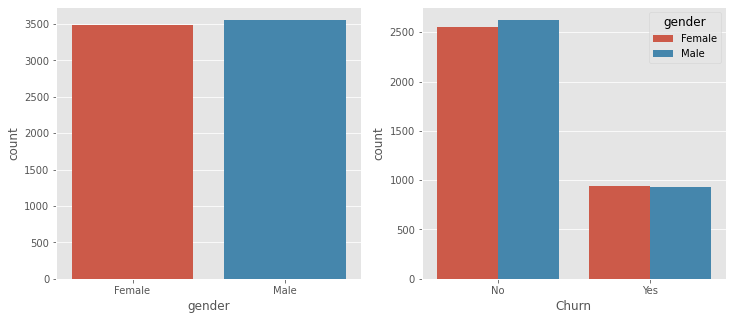

In [44]:
col = 'gender'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.countplot(x=col, data=df, ax=axes[0])
sns.countplot(x=target, data=df, hue=col, ax=axes[1])

男女で解約率に偏りはない

<AxesSubplot:xlabel='Churn', ylabel='count'>

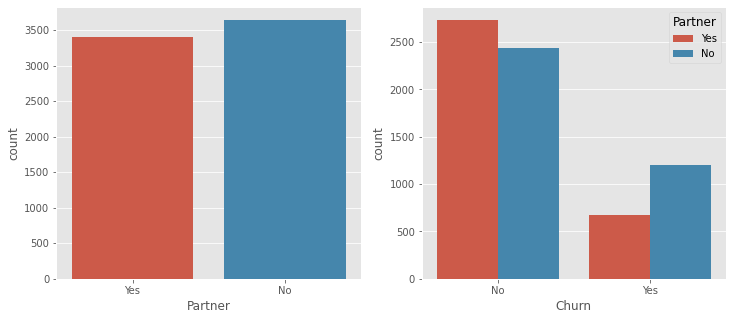

In [45]:
col = 'Partner'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.countplot(x=col, data=df, ax=axes[0])
sns.countplot(x=target, data=df, hue=col, ax=axes[1])

配偶者がいない人の方が解約しやすい。。？

<AxesSubplot:xlabel='Churn', ylabel='count'>

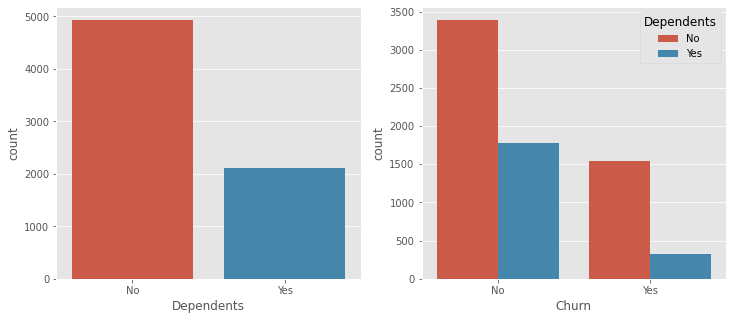

In [46]:
col = 'Dependents'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.countplot(x=col, data=df, ax=axes[0])
sns.countplot(x=target, data=df, hue=col, ax=axes[1])

扶養家族がいる人の方が解約しにくい。。？

<AxesSubplot:xlabel='Churn', ylabel='count'>

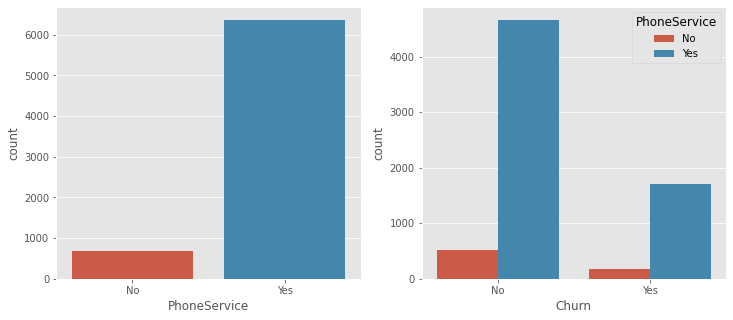

In [47]:
col = 'PhoneService'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.countplot(x=col, data=df, ax=axes[0])
sns.countplot(x=target, data=df, hue=col, ax=axes[1])

通話サービスの加入有無は解約率にあまり関係なさそう

<AxesSubplot:xlabel='Churn', ylabel='count'>

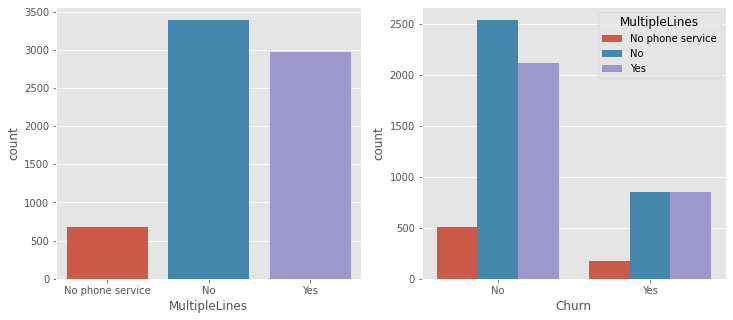

In [48]:
col = 'MultipleLines'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.countplot(x=col, data=df, ax=axes[0])
sns.countplot(x=target, data=df, hue=col, ax=axes[1])

解約した人に占める複数電話回線を契約している人の割合は、解約しなかった人のそれより大きいが、、、どうなんだろう

<AxesSubplot:xlabel='Churn', ylabel='count'>

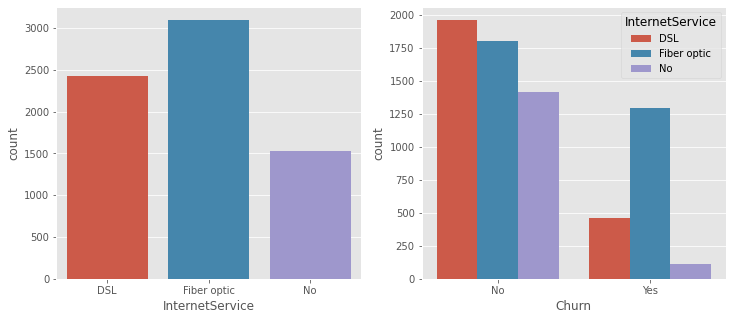

In [50]:
col = 'InternetService'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.countplot(x=col, data=df, ax=axes[0])
sns.countplot(x=target, data=df, hue=col, ax=axes[1])

プロバイダ別に見ると、解約した人に占めるFiber opticの割合が圧倒的

<AxesSubplot:xlabel='Churn', ylabel='count'>

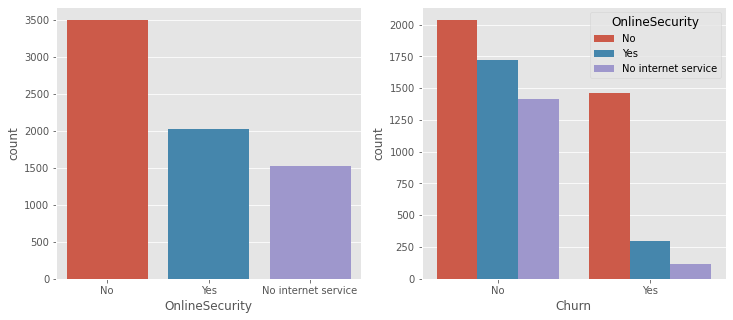

In [51]:
col = 'OnlineSecurity'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.countplot(x=col, data=df, ax=axes[0])
sns.countplot(x=target, data=df, hue=col, ax=axes[1])

オンラインセキュリティサービスの加入有無は、解約にあまり関係なさそう

<AxesSubplot:xlabel='Churn', ylabel='count'>

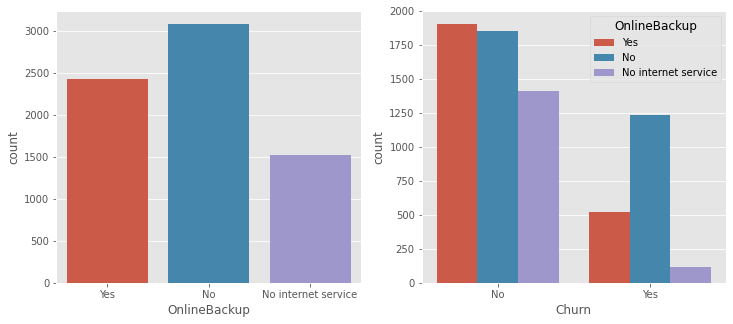

In [52]:
col = 'OnlineBackup'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.countplot(x=col, data=df, ax=axes[0])
sns.countplot(x=target, data=df, hue=col, ax=axes[1])

オンラインバックアップサービスを利用している人の方が解約しにくい、、確かに解約するためにバックアップを移動させるのは手間

<AxesSubplot:xlabel='Churn', ylabel='count'>

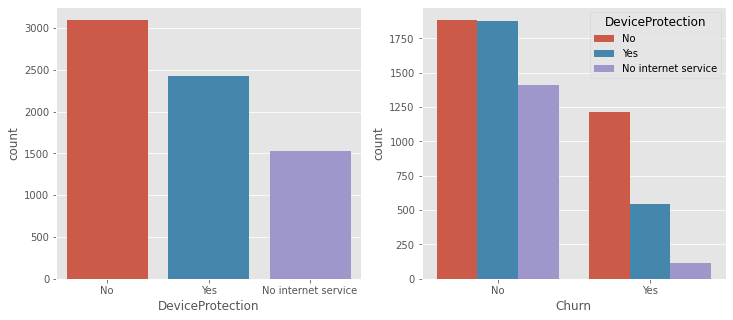

In [53]:
col = 'DeviceProtection'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.countplot(x=col, data=df, ax=axes[0])
sns.countplot(x=target, data=df, hue=col, ax=axes[1])

解約した人に占めるDevice Protection (Androidの端末保護機能) が無効になっている人の割合が高い  
元々は端末を第三者に不正利用されるのを防ぐ機能だが、端末修理や譲渡のために解除したいニーズがあるらしく、端末保護機能を有料で解除する業者もネット上に存在している  
ということは、これを無効にした人の中には端末を譲渡して通信業者も他社に乗り換えた人がいるのかも  

<AxesSubplot:xlabel='Churn', ylabel='count'>

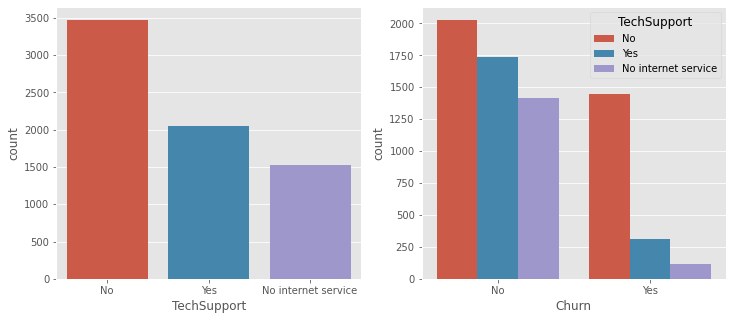

In [54]:
col = 'TechSupport'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.countplot(x=col, data=df, ax=axes[0])
sns.countplot(x=target, data=df, hue=col, ax=axes[1])

解約しなかった人に占めるテックサポート利用者の割合は、解約した人に占めるそれよりも大きい  
きっとテックサポートが丁寧なのだろう

<AxesSubplot:xlabel='Churn', ylabel='count'>

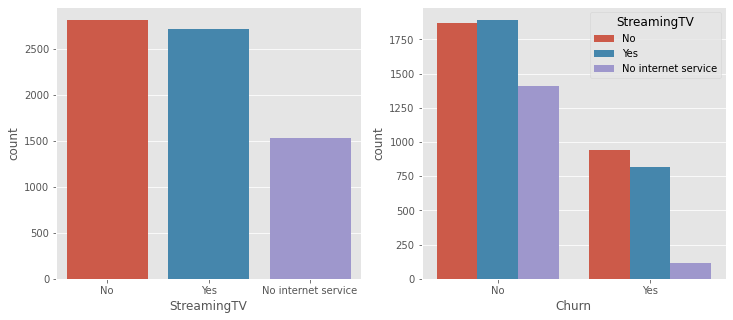

In [55]:
col = 'StreamingTV'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.countplot(x=col, data=df, ax=axes[0])
sns.countplot(x=target, data=df, hue=col, ax=axes[1])

TV配信サービスの加入有無は解約率にあまり関係なさそう

<AxesSubplot:xlabel='Churn', ylabel='count'>

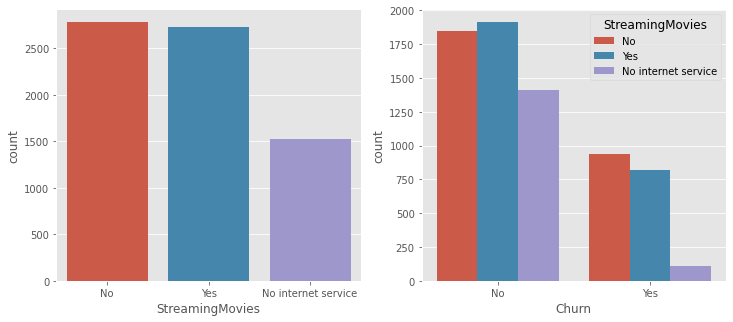

In [57]:
col = 'StreamingMovies'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.countplot(x=col, data=df, ax=axes[0])
sns.countplot(x=target, data=df, hue=col, ax=axes[1])

映画配信サービスの加入有無は解約率にあまり関係なさそう

<AxesSubplot:xlabel='Churn', ylabel='count'>

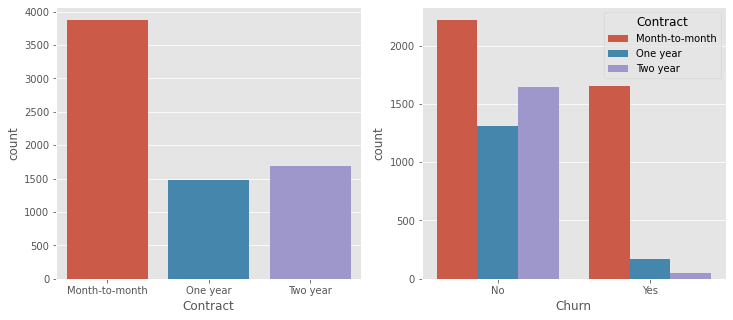

In [58]:
col = 'Contract'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.countplot(x=col, data=df, ax=axes[0])
sns.countplot(x=target, data=df, hue=col, ax=axes[1])

長期契約になるほど解約しにくい

<AxesSubplot:xlabel='Churn', ylabel='count'>

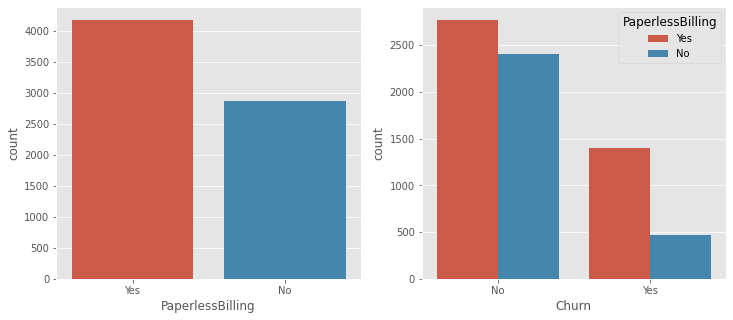

In [59]:
col = 'PaperlessBilling'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.countplot(x=col, data=df, ax=axes[0])
sns.countplot(x=target, data=df, hue=col, ax=axes[1])

請求書のペーパーレス化は解約にあまり関係なさそう

<AxesSubplot:xlabel='Churn', ylabel='count'>

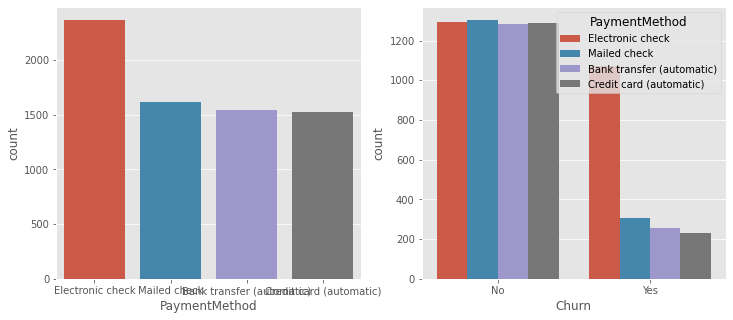

In [61]:
col = 'PaymentMethod'

fig, axes = plt.subplots(figsize=(12,5), ncols=2)
sns.countplot(x=col, data=df, ax=axes[0])
sns.countplot(x=target, data=df, hue=col, ax=axes[1])

解約した人に占める電子決済利用者の割合が突出している

## Data Preparation

In [50]:
from sklearn.preprocessing import StandardScaler
from category_encoders import OrdinalEncoder

In [96]:
# csvに保存したデータを読み込み
train_df = pd.read_csv(os.path.join(input_path, 'train_df.csv'))
test_df = pd.read_csv(os.path.join(input_path, 'test_df.csv'))

train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0871-URUWO,Male,0,Yes,No,13,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.25,1359.00,Yes
1,3078-ZKNTS,Female,0,Yes,Yes,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.75,246.70,No
2,1915-IOFGU,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,70.50,70.50,Yes
3,5647-FXOTP,Female,1,Yes,No,60,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,6401.25,No
4,9866-QEVEE,Male,0,No,No,19,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),86.00,1532.45,Yes


In [97]:
# ターゲットを変換
train_df['Churn'] = train_df['Churn'].map({'Yes':1, 'No':0})
test_df['Churn'] = test_df['Churn'].map({'Yes':1, 'No':0})

In [98]:
# 数値変数の標準化
# 今回はツリー系アルゴリズムを使用する本来は不要だが、勉強のために実施しておく
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0871-URUWO,Male,0,Yes,No,-0.791990,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),1.255598,-0.403651,1
1,3078-ZKNTS,Female,0,Yes,Yes,-0.791990,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),-1.485131,-0.894834,0
2,1915-IOFGU,Female,0,No,No,-1.280574,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,0.200833,-0.972643,1
3,5647-FXOTP,Female,1,Yes,No,1.121629,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1.376855,1.822967,0
4,9866-QEVEE,Male,0,No,No,-0.547698,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0.715758,-0.327057,1


In [99]:
# customerID以外のカテゴリ変数をOrdinalエンコーディング
cat_cols = []
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        cat_cols.append(col)
cat_cols.remove('customerID')
encoder = OrdinalEncoder()
train_df[cat_cols] = encoder.fit_transform(train_df[cat_cols])
test_df[cat_cols] = encoder.transform(test_df[cat_cols])

train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0871-URUWO,1,0,1,1,-0.791990,1,1,1,1,1,1,1,1,1,1,1,1,1.255598,-0.403651,1
1,3078-ZKNTS,2,0,1,2,-0.791990,1,2,2,2,2,2,2,2,2,2,1,2,-1.485131,-0.894834,0
2,1915-IOFGU,2,0,2,1,-1.280574,1,2,1,1,1,3,1,3,3,1,2,3,0.200833,-0.972643,1
3,5647-FXOTP,2,1,1,1,1.121629,1,1,1,1,3,1,1,1,1,1,1,3,1.376855,1.822967,0
4,9866-QEVEE,1,0,2,1,-0.547698,1,1,1,1,1,3,1,3,1,1,1,2,0.715758,-0.327057,1


In [100]:
# 欠損値が含まれている
train_df[train_df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
426,3213-VVOLG,1,0,1,2,-1.321289,1,1,2,2,2,2,2,2,2,2,2,4,-1.299094,NaN,0
884,1371-DWPAZ,2,0,1,2,-1.321289,2,3,3,3,3,1,3,1,3,2,2,1,-0.279210,NaN,0
1483,5709-LVOEQ,2,0,1,2,-1.321289,1,2,3,3,3,1,1,1,1,2,2,4,0.544670,NaN,0
1628,4075-WKNIU,2,0,1,2,-1.321289,1,1,3,1,3,1,3,1,3,2,2,4,0.295512,NaN,0
2412,4367-NUYAO,1,0,1,2,-1.321289,1,1,2,2,2,2,2,2,2,2,2,4,-1.285805,NaN,0
3086,2775-SEFEE,1,0,2,2,-1.321289,1,1,3,3,3,3,3,3,3,2,1,2,-0.084868,NaN,0
3091,3115-CZMZD,1,0,2,2,-1.321289,1,2,2,2,2,2,2,2,2,2,2,4,-1.468521,NaN,0
4491,7644-OMVMY,1,0,1,2,-1.321289,1,2,2,2,2,2,2,2,2,2,2,4,-1.481809,NaN,0


In [ ]:
# 欠損値をトレーニングデータの中央値で保管
train_df.fillna(train_df.median(), inplace=True)
test_df.fillna(train_df.median(), inplace=True)

train_df[train_df['TotalCharges'].isna()]

In [102]:
# 前処理後のデータプレビュー
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0871-URUWO,1,0,1,1,-0.791990,1,1,1,1,1,1,1,1,1,1,1,1,1.255598,-0.403651,1
1,3078-ZKNTS,2,0,1,2,-0.791990,1,2,2,2,2,2,2,2,2,2,1,2,-1.485131,-0.894834,0
2,1915-IOFGU,2,0,2,1,-1.280574,1,2,1,1,1,3,1,3,3,1,2,3,0.200833,-0.972643,1
3,5647-FXOTP,2,1,1,1,1.121629,1,1,1,1,3,1,1,1,1,1,1,3,1.376855,1.822967,0
4,9866-QEVEE,1,0,2,1,-0.547698,1,1,1,1,1,3,1,3,1,1,1,2,0.715758,-0.327057,1


## Modeling

LightGBMでモデルを作成する  
バリデーションスキームはLeave One Outで、ランダムに8:2に分割する

In [71]:
import lightgbm as lgb

In [ ]:
# ターゲットと特徴量に分離
train_x = train_df.drop(['customerID','Churn'], axis=1)
train_y = train_df['Churn']
test_x = test_df.drop(['customerID','Churn'], axis=1)
test_y = test_df['Churn']

# EarlyStopping用にさらにデータを分割する
train_x_, val_x, train_y_, val_y = train_test_split(train_x, train_y, train_size=0.8, random_state=888, shuffle=True)

# 学習用のデータ
dtrain = lgb.Dataset(data=train_x_, label=train_y_)
# EarlyStoppingのためのデータ
dval = lgb.Dataset(data=val_x, label=val_y, reference=dtrain)

# ハイパーパラメータ設定
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.02,
    'num_leaves': 15,
    'bagging_freq': 5,
    'bagging_fraction': 0.8,
    'feature_fraction': 0.8,
    'random_state': 777,
    'min_data_in_leaf': 1,
    'verbose': -1
}

# モデルの学習実行
model = lgb.train(
    params, dtrain, num_boost_round=9999, valid_sets=dval, early_stopping_rounds=200
)

In [108]:
from sklearn.metrics import roc_auc_score

val_pred = model.predict(val_x)
print('validation_score(AUC):', roc_auc_score(y_true=val_y, y_score=val_pred))

validation_score(AUC): 0.8311496770480271


## Prediction

In [105]:
test_pred = model.predict(test_x)

print('test_score(AUC):', roc_auc_score(y_true=test_y, y_score=test_pred))

test_score(AUC): 0.848412674294339


In [117]:
# 結果を格納しておく
results = {}

result = {
    'model': 'LightGBM',
    'validation_score(AUC)': roc_auc_score(y_true=val_y, y_score=val_pred),
    'test_score(AUC)': roc_auc_score(y_true=test_y, y_score=test_pred)
}
results['Manually'] = result

results

{'Manually': {'model': 'LightGBM',
  'validation_score(AUC)': 0.8311496770480271,
  'test_score(AUC)': 0.848412674294339}}

### Compare with DataRobot

### Autopilot

In [110]:
# csvに保存したデータを読み込み
train_df = pd.read_csv(os.path.join(input_path, 'train_df.csv'))
test_df = pd.read_csv(os.path.join(input_path, 'test_df.csv'))

In [ ]:
import datarobot as dr
from datarobot.enums import AUTOPILOT_MODE

api_token = 'api_token'
api_endpoint = 'api_endpoint'
c = dr.Client(token=api_token, endpoint=api_endpoint)

print('接続確認', c.verify)

In [ ]:
# オートパイロット実行
project_name = 'studyML'
project_target = 'Churn'
project_metric = 'AUC'
AP_MODE = AUTOPILOT_MODE.FULL_AUTO
MAX_WORKER = 25

print("Uploading ...")
project = dr.Project.create(train_df, project_name=project_name)
print("The new project has ID:", project.id)
project.set_worker_count(MAX_WORKER)

pm = dr.StratifiedCV(
            holdout_pct=20,
            reps=5,
            seed=777
        )
ao = dr.AdvancedOptions(
            seed=777,
            blend_best_models=False,
            prepare_model_for_deployment=True,
            consider_blenders_in_recommendation=False,
            autopilot_with_feature_discovery=True,
            feature_discovery_supervised_feature_reduction=True
        )

print("Starting Auto Pilot :" , project_name)
project.set_target(
            target=project_target,
            metric=project_metric,
            mode=AP_MODE,
            max_wait=28800,
            partitioning_method=pm,
            advanced_options=ao
        )

print("Auto Pilot finished :" , project_name)

In [ ]:
# 作成されたモデル一覧の中からデプロイ推奨のものを取得
import json

project_id = project.id
recommendation_type = dr.enums.RECOMMENDED_MODEL_TYPE.RECOMMENDED_FOR_DEPLOYMENT
recommendation = dr.ModelRecommendation.get(project_id,recommendation_type)
recommended_model = recommendation.get_model()
model_id = recommended_model.id
model_type = recommended_model.model_type
print('model ID:', model_id)
print('model type:', model_type)

dr_metrics = json.dumps(recommended_model.metrics, indent=2)
print(dr_metrics)

### Deploy

In [ ]:
# デプロイ作成
# Dynamic Prediction Cores にデプロイ
prediction_server = dr.PredictionServer.list()[0]

deployment_name = 'studyML'
deployment = dr.Deployment.create_from_learning_model (
                model_id, 
                label=deployment_name,
                description='ML勉強会のハンズオンにて作成したデプロイ',
                default_prediction_server_id=prediction_server.id
        )

deployment_id = deployment.id
print('deployment ID:', deployment_id)

### Prediction

In [ ]:
# バッチ予測実行
job = dr.BatchPredictionJob.score_pandas(
    deployment=deployment_id,
    df=test_df,
    read_timeout=660
)

dr_pred = job[1].loc[:, ['customerID', 'Churn', 'Churn_Yes_PREDICTION']]
dr_pred['Churn'] = dr_pred['Churn'].map({'Yes': 1, 'No': 0})
dr_pred.rename(columns={'Churn_Yes_PREDICTION': 'Prediction'}, inplace=True)
dr_pred.head()

In [138]:
# 予測結果を出力しておく
dr_pred.to_csv(os.path.join(input_path, 'dr_pred.csv'), encoding='utf-8', index=False)

In [ ]:
# AUCを計算
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_true=dr_pred['Churn'], y_score=dr_pred['Prediction'])
result = {
    'model': model_type,
    'validation_score(AUC)': recommended_model.metrics['AUC']['validation'],
    'cv_score(AUC)': recommended_model.metrics['AUC']['crossValidation'],
    'test_score(AUC)': auc_score
}
results['DataRobot'] = result

print(json.dumps(results, indent=2))


In [142]:
# 比較用にデータを整形
t1 = dr_pred.copy()
t1['Model'] = 'DataRobot Elastic-Net'
t2 = dr_pred.copy()
t2['Prediction'] = test_pred
t2['Model'] = 'Manually LightGBM'
pred_sns = pd.concat([t1, t2], axis=0).reset_index(drop=True)
pred_sns.tail()

,customerID,Churn,Prediction,Model
2813,3571-RFHAR,1,0.285139,Manually LightGBM
2814,4472-VESGY,0,0.295401,Manually LightGBM
2815,4079-WWQQQ,0,0.031019,Manually LightGBM
2816,7363-QTBIW,0,0.622600,Manually LightGBM
2817,0114-PEGZZ,0,0.454308,Manually LightGBM


In [143]:
# 比較用のデータも出力しておく
pred_sns.to_csv(os.path.join(input_path, 'pred_to_compare.csv'), encoding='utf-8', index=False)

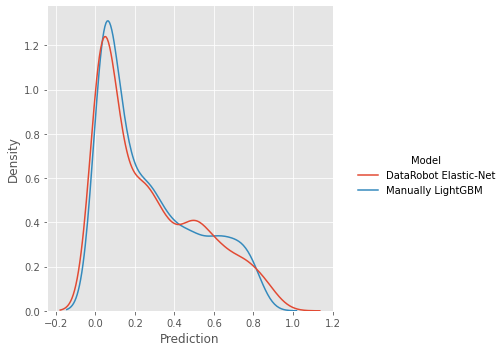

In [146]:
%matplotlib inline

sns.displot(data=pred_sns, x='Prediction', hue='Model', kind='kde')

### 全部終わったらDataRobotのリソースを綺麗にしておく

In [135]:
# デプロイ削除
deployment = dr.Deployment.get(deployment_id=deployment_id)
deployment.delete()

In [ ]:
# プロジェクト削除
project = dr.Project.get(project_id=project_id)
project.delete()